In [1]:
import pandas as pd
import numpy as np

In [3]:
np.random.seed(42)

In [5]:
data = {
    'age': np.random.randint(20, 80, size=1000),
    'gender': np.random.choice(['male', 'female'], size=1000),
    'exercise': np.random.choice(['never', 'occasionally', 'regularly'], size=1000),
    'diet': np.random.choice(['poor', 'average', 'good'], size=1000),
    'blood_pressure': np.random.randint(90, 180, size=1000),
    'heart_rate': np.random.randint(60, 100, size=1000),
    'labs_result': np.random.uniform(3.5, 7.5, size=1000),  # e.g., lab results
    'medication_history': np.random.choice(['none', 'some', 'many'], size=1000),
    'recommendation': np.random.choice(['improve diet', 'increase exercise', 'consult doctor', 'perform regular checkups'], size=1000)
}

In [7]:
df = pd.DataFrame(data)

In [9]:
df.head()

,age,gender,exercise,diet,blood_pressure,heart_rate,labs_result,medication_history,recommendation
0,58,female,never,good,123,86,3.762768,some,increase exercise
1,71,female,occasionally,good,145,94,7.048477,none,increase exercise
2,48,male,occasionally,poor,117,80,5.179395,some,consult doctor
3,34,female,occasionally,good,126,84,5.487582,none,perform regular checkups
4,62,male,regularly,average,96,87,7.167768,many,increase exercise


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

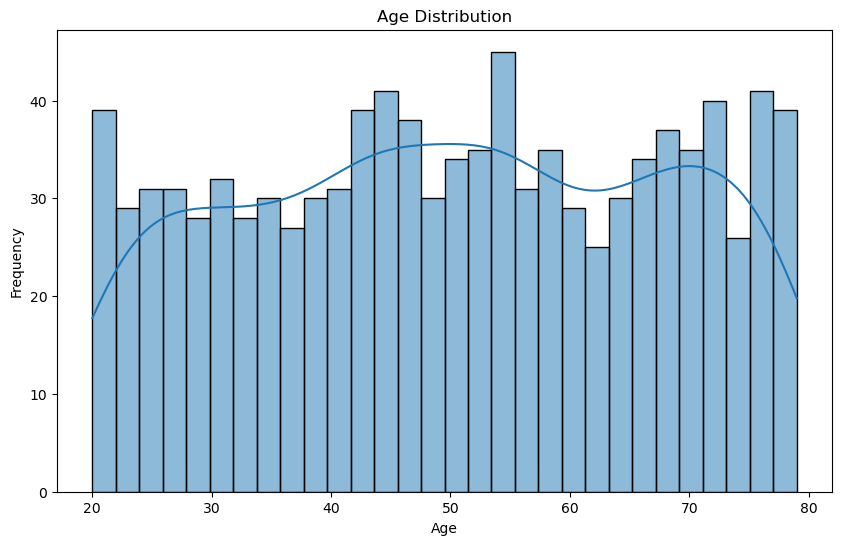

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

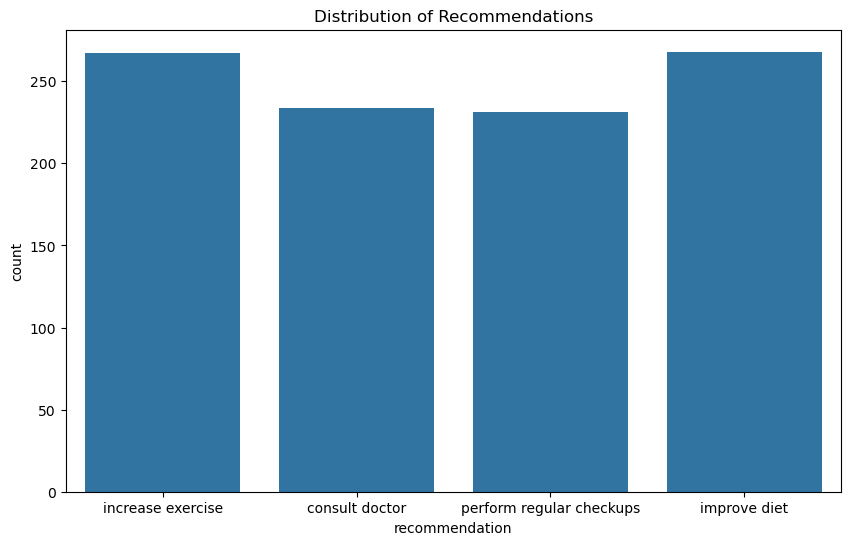

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='recommendation', data=df)
plt.title('Distribution of Recommendations')
plt.show()

In [13]:
print(df.describe())

               age  blood_pressure   heart_rate  labs_result
count  1000.000000     1000.000000  1000.000000  1000.000000
mean     50.200000      134.531000    79.755000     5.451498
std      17.372905       25.579354    11.475481     1.159718
min      20.000000       90.000000    60.000000     3.500746
25%      36.000000      112.000000    70.000000     4.436571
50%      51.000000      135.000000    80.000000     5.440076
75%      66.000000      156.000000    90.000000     6.452147
max      79.000000      179.000000    99.000000     7.487637


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['blood_pressure', 'heart_rate', 'labs_result']] = scaler.fit_transform(df[['blood_pressure', 'heart_rate', 'labs_result']])

In [23]:
df = pd.get_dummies(df, columns=['gender', 'exercise', 'diet', 'medication_history'], drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('recommendation', axis=1)
y = df['recommendation']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
df['health_score'] = df['blood_pressure'] / df['heart_rate']
X['health_score'] = X['blood_pressure'] / X['heart_rate']  

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [35]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

                          precision    recall  f1-score   support

          consult doctor       0.35      0.29      0.32        51
            improve diet       0.31      0.33      0.32        57
       increase exercise       0.28      0.28      0.28        54
perform regular checkups       0.31      0.34      0.33        38

                accuracy                           0.31       200
               macro avg       0.31      0.31      0.31       200
            weighted avg       0.31      0.31      0.31       200



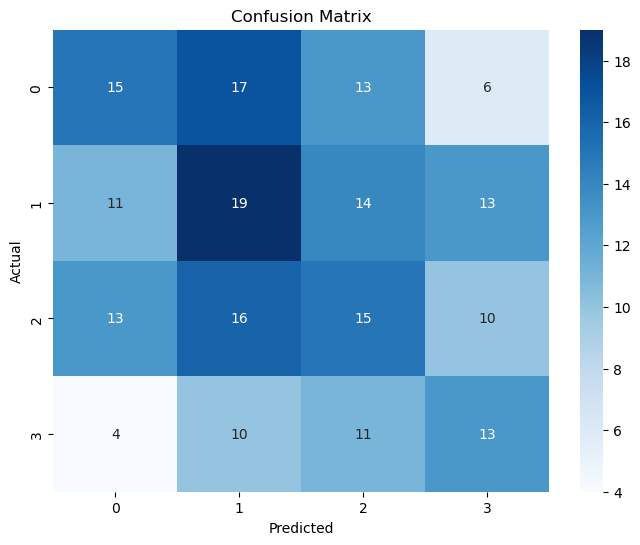

In [37]:
from sklearn.metrics import confusion_matrix, roc_auc_score
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
def generate_recommendations(predictions):
    recommendations = []
    for pred in predictions:
        recommendations.append(pred) 
recommendations = generate_recommendations(y_pred)
print(recommendations)

None
